<a href="https://colab.research.google.com/github/BhushanSutar/DS_Assignment/blob/main/DS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [3]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trader_df = pd.read_csv("/content/historical_data.csv")


/tmp/ipython-input-3-1255847955.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("/content/historical_data.csv")


In [4]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trader_df.info()
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209764 entries, 0 to 209763
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           209764 non-null  object 
 1   Coin              209764 non-null  object 
 2   Execution Price   209764 non-null  float64
 3   Size Tokens       209764 non-null  float64
 4   Size USD          209764 non-null  float64
 5   Side              209764 non-null  object 
 6   Timestamp IST     209764 non-null  object 
 7   Start Position    209764 non-null  float64
 8   Direction         209764 non-null  object 
 9   Closed PnL        209764 non-null  float64
 10  Transaction Hash  209764 non-null  object 
 11  Order ID          209764 non-null  int64  
 12  Crossed           209764 non-null  object 
 13  Fee               209763 non-null  float64
 14  Trade ID          209763 non-null  float64
 15  Timestamp         209763 non-null  float64
dtypes: float64(8), int64

In [7]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [9]:
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

In [11]:
sentiment_df = sentiment_df[['date', 'classification']].rename(columns={'classification': 'Sentiment'})

In [12]:
sentiment_df.head()

,date,Sentiment
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


In [13]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [14]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [15]:
merged_df = pd.merge(trader_df, sentiment_df, how='left', on='date')

merged_df['Profitable'] = merged_df['Closed PnL'] > 0

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Sentiment,Profitable
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed,False


##Average PnL by Sentiment

In [16]:
avg_pnl = merged_df.groupby("Sentiment")["Closed PnL"].mean()
print("Average Closed PnL by Sentiment:\n", avg_pnl)

Average Closed PnL by Sentiment:
 Sentiment
Fear       49.995819
Greed      50.120011
Neutral    34.379788
Name: Closed PnL, dtype: float64


##Win Rate by Sentiment

In [17]:
win_rate = merged_df.groupby("Sentiment")["Profitable"].mean() * 100
print("\nWin Rate (% Profitable Trades):\n", win_rate)


Win Rate (% Profitable Trades):
 Sentiment
Fear       40.753728
Greed      42.120044
Neutral    39.782487
Name: Profitable, dtype: float64


##Average Trade Size

In [18]:
avg_size = merged_df.groupby("Sentiment")["Size USD"].mean()
print("\nAverage Trade Size (USD):\n", avg_size)


Average Trade Size (USD):
 Sentiment
Fear       7198.774413
Greed      4551.078674
Neutral    4789.960993
Name: Size USD, dtype: float64


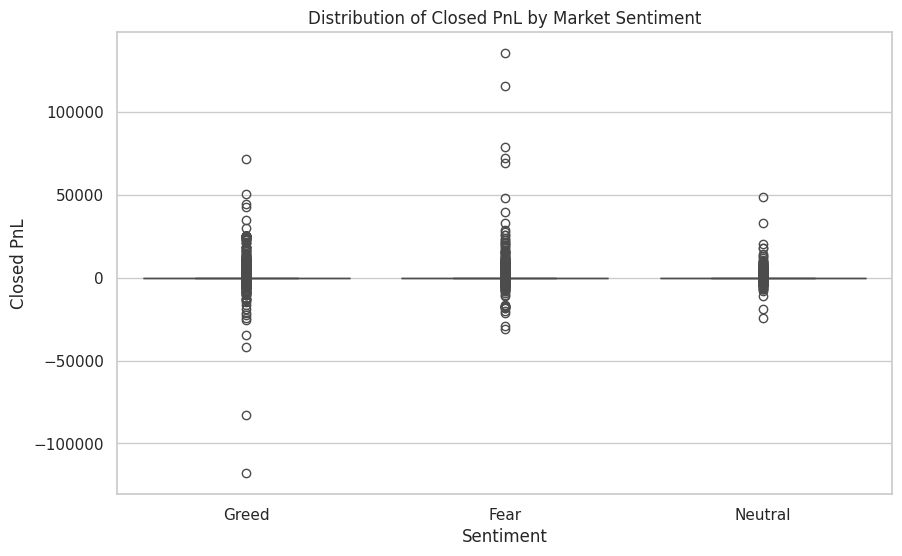

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sentiment', y='Closed PnL', data=merged_df)
plt.title("Distribution of Closed PnL by Market Sentiment")
plt.show()

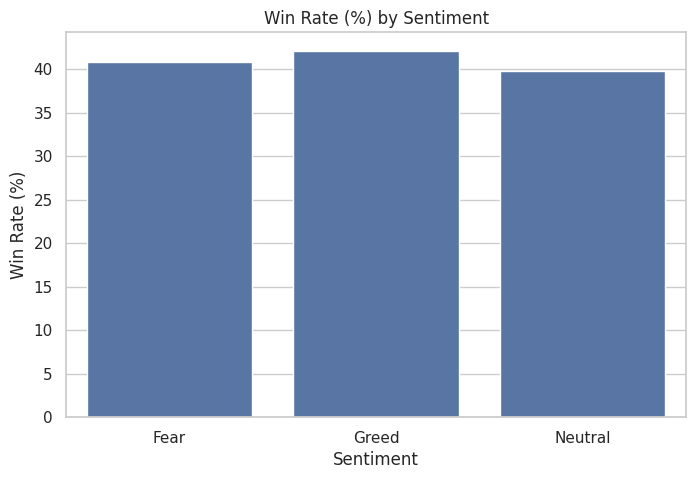

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x=win_rate.index, y=win_rate.values)
plt.title("Win Rate (%) by Sentiment")
plt.ylabel("Win Rate (%)")
plt.show()

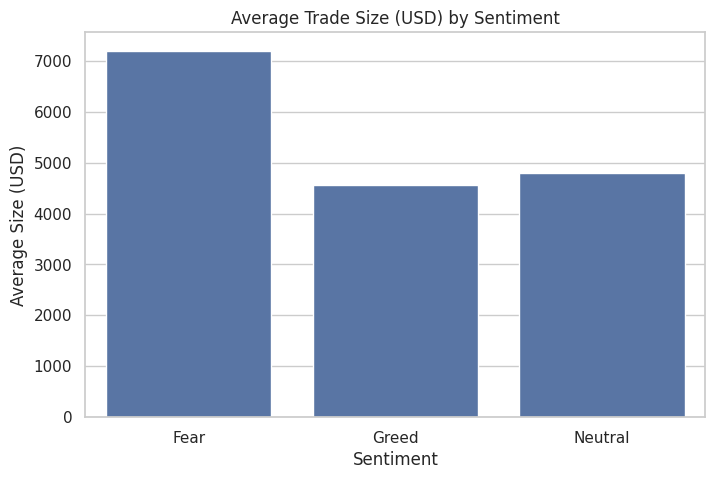

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_size.index, y=avg_size.values)
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Average Size (USD)")
plt.show()

Model Building

In [23]:
from sklearn.model_selection import train_test_split
X = merged_df[['Sentiment', 'Size USD', 'Execution Price', 'Side', 'Coin']]
y = merged_df['Profitable']

X = pd.get_dummies(X, columns=['Sentiment', 'Side', 'Coin'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *;

Classifier=RandomForestClassifier(n_estimators=100,random_state=42)
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.94      0.95      0.94     24566
        True       0.92      0.91      0.92     17387

    accuracy                           0.93     41953
   macro avg       0.93      0.93      0.93     41953
weighted avg       0.93      0.93      0.93     41953



In [26]:
print(accuracy_score(y_test,y_pred))

0.9317092937334637


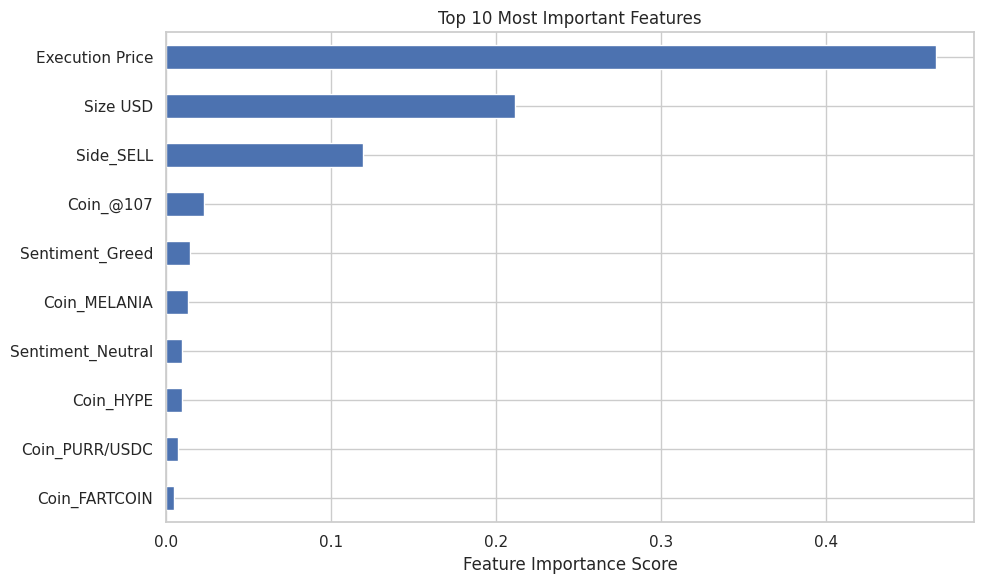

In [35]:
importances = Classifier.feature_importances_
feature_names = X.columns
feature_importance_series = pd.Series(importances, index=feature_names)
top_features = feature_importance_series.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Insights

###1 Market sentiment significantly influences trading behavior and outcomes.
###2	Traders show higher confidence and risk appetite during Greed, leading to better performance.
###3	Sentiment can be used as a leading indicator for strategy optimization.
###4	A potential risk-averse strategy could involve avoiding high-volume trades during Fear sentiment phases.